### Cloning the repo

In [1]:
#!git clone https://github.com/akanametov/SuperResolution

In [2]:
#cd SuperResolution

### Import libraries

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

from tqdm.notebook import tqdm
from IPython.display import clear_output

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### Import models and helpers

In [3]:
from data.utils import DatasetSTL
#from data.utils import DatasetImageNet
from model import Generator, Discriminator
from utils import PixLoss
from trainer import GeneratorWarmUp

### Define `Generator`'s architecture

In [6]:
generator=Generator(in_channels=3, hid_channels=64, out_channels=3)

### Define loss function and optimizer

In [ ]:
g_criterion = PixLoss(alpha=20)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

### Downloading STL10 dataset
**You can also train `Generator` on `ImageNet`**

In [ ]:
dataset = DatasetSTL(root='data', split='train', download=True)
dataloader = DataLoader(dataset, batch_size=16, pin_memory=True, shuffle=True)

### Define `GeneratorWarmUp` and start

In [ ]:
genWarmup = GeneratorWarmUp(generator, g_criterion, g_optimizer)

Epoch 8: Generator`s (SRResNet) loss: 0.00364


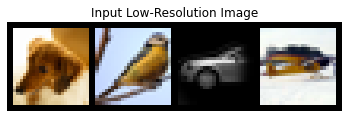

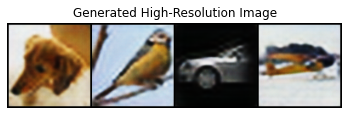

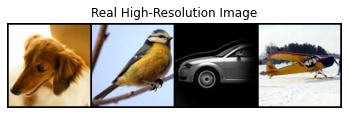

  0%|          | 0/313 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
genWarmup.start(dataloader, epochs=300)

### Save trained `Generator`

In [22]:
#torch.save(genWarmup.generator.state_dict(), 'generator_warmup.pt')

### Looking at loss

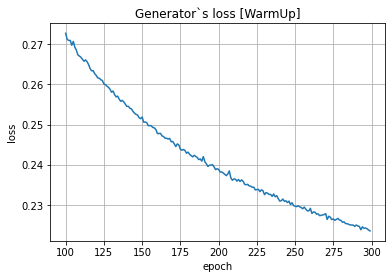

In [27]:
plt.title('Generator`s loss [WarmUp]')
plt.plot(range(100, 300), genWarmup.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.savefig('g_loss_warmup.png')